A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [112]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']


In [113]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [114]:
del df['CLIENTNUM']

In [115]:
categ_feature=['Gender','Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']

In [116]:
for x in categ_feature:
    print(x,"--->",df[x].unique())

Gender ---> ['M' 'F']
Attrition_Flag ---> ['Existing Customer' 'Attrited Customer']
Education_Level ---> ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ---> ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ---> ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ---> ['Blue' 'Gold' 'Silver' 'Platinum']


In [117]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Let's create a function that calculates what percentage of people are churned based on just one feature.

In [118]:
def percentage_chur_cust(feature):
    df['x']='a'
    df['y']='b'
    a=df.groupby(feature).count()['x'].reset_index()
    a.columns=[feature,'Total_Customers']
    b=df[df['Attrition_Flag']=='Attrited Customer'].groupby(feature).count()['y'].reset_index()
    b.columns=[feature,'Total_Churned_Customers']
    c=pd.merge(a,b)
    del df['x']
    del df['y']
    c['percented']=(c['Total_Churned_Customers']/c['Total_Customers'])*100
    c=c.sort_values(by='percented',ascending=False)
    plt.figure(figsize=(10,7))
    sns.barplot(c[feature],c['percented'])
    return c

,Education_Level,Total_Customers,Total_Churned_Customers,percented
1,Doctorate,451,95,21.064302
4,Post-Graduate,516,92,17.829457
6,Unknown,1519,256,16.853193
5,Uneducated,1487,237,15.938130
2,Graduate,3128,487,15.569054
0,College,1013,154,15.202369
3,High School,2013,306,15.201192


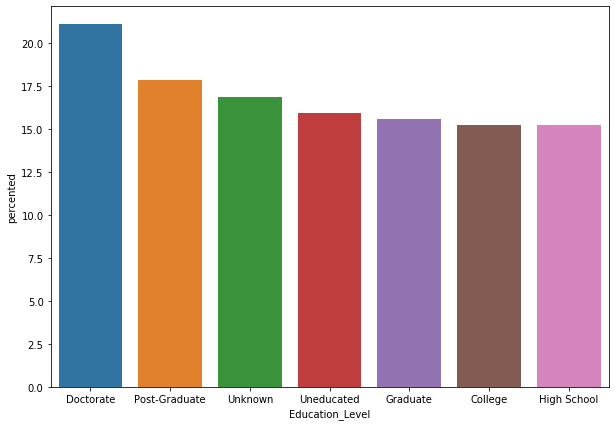

In [119]:
percentage_chur_cust('Education_Level')


There is almost a direct linear correlation between highest level of education achievement and how likely it's to churn the service

F    52.908068
M    47.091932
Name: Gender, dtype: float64


,Gender,Total_Customers,Total_Churned_Customers,percented
0,F,5358,930,17.357223
1,M,4769,697,14.615223


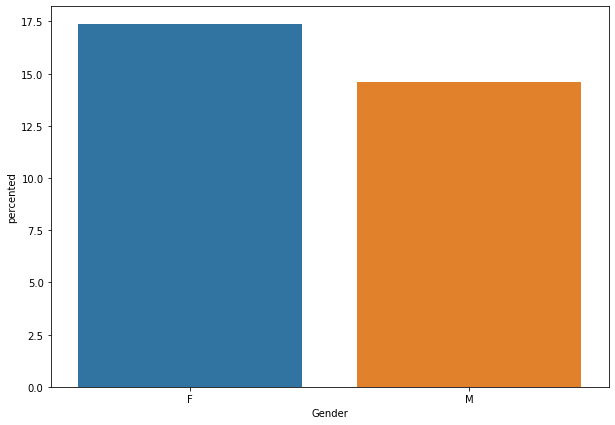

In [120]:
print(df['Gender'].value_counts(normalize=True)*100)
percentage_chur_cust('Gender')


,Marital_Status,Total_Customers,Total_Churned_Customers,percented
3,Unknown,749,129,17.222964
2,Single,3943,668,16.941415
0,Divorced,748,121,16.176471
1,Married,4687,709,15.126947


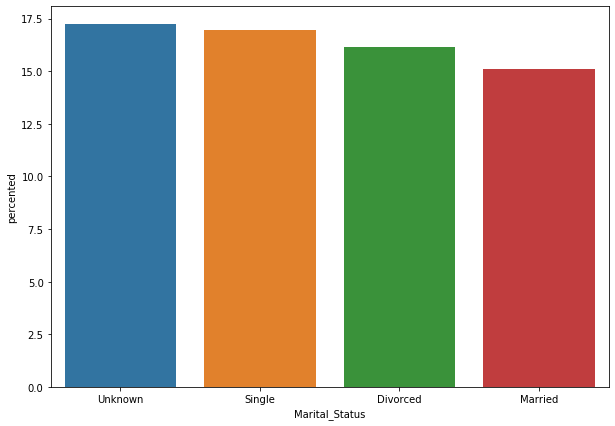

In [121]:
percentage_chur_cust('Marital_Status')


,Income_Category,Total_Customers,Total_Churned_Customers,percented
0,$120K +,727,126,17.331499
4,Less than $40K,3561,612,17.186184
5,Unknown,1112,187,16.816547
3,$80K - $120K,1535,242,15.765472
1,$40K - $60K,1790,271,15.139665
2,$60K - $80K,1402,189,13.480742


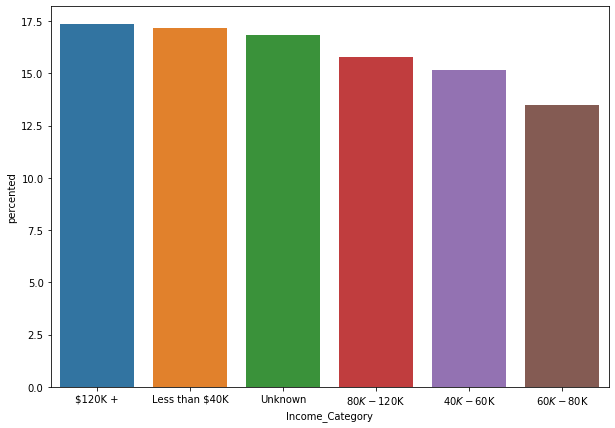

In [122]:
percentage_chur_cust('Income_Category')


,Card_Category,Total_Customers,Total_Churned_Customers,percented
2,Platinum,20,5,25.000000
1,Gold,116,21,18.103448
0,Blue,9436,1519,16.097923
3,Silver,555,82,14.774775


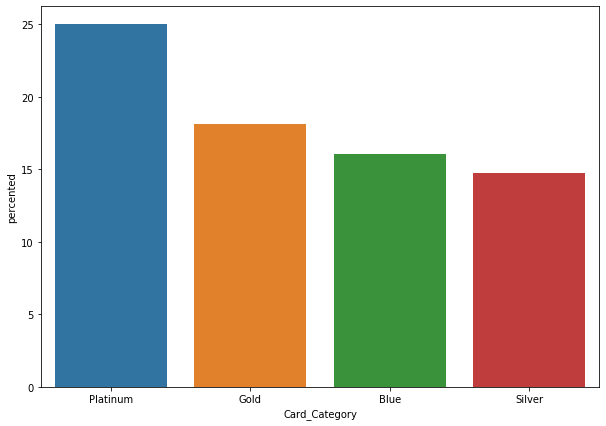

In [123]:
percentage_chur_cust('Card_Category')

Here we can se that the highest level of Card Service is having the highest level of churning

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

We have a very unbalanced dataset for what we are trying to predict so we'll have to take measures to ensure that in the spliting on the data

In [125]:
df = pd.get_dummies(df,columns=['Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category'])

Since we have a ver skwed dataset towards existing customers wer are going to rebalance the records to a 50-50 state
by using the number of samplesw = 8500 --> number of Existing Customers in the original DF

In [126]:
df_minority = df.loc[df['Attrition_Flag'] == 'Attrited Customer']
df_majority = df.loc[df['Attrition_Flag'] == 'Existing Customer']

df_minoriry_upscaled = resample(df_minority,replace=True,
                               n_samples=8500,
                               random_state=123)

df = pd.concat([df_minoriry_upscaled,df_majority]).reset_index(drop=True)



In [127]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Attrition_Flag"] = ord_enc.fit_transform(df[["Attrition_Flag"]])
print(" 1:Existing Customer","\n","0:Attrited Customer")
print(df['Attrition_Flag'].value_counts(normalize=True))
df.head()

 1:Existing Customer 
 0:Attrited Customer
1.0    0.5
0.0    0.5
Name: Attrition_Flag, dtype: float64


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,51,5,45,6,3,6,34516.0,0,34516.0,...,1,0,0,0,0,0,1,0,0,0
1,0.0,48,4,37,5,3,4,15987.0,0,15987.0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,51,4,42,6,4,2,34516.0,230,34286.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,55,2,46,5,3,2,16828.0,2517,14311.0,...,1,0,0,0,0,0,1,0,0,0
4,0.0,48,2,30,3,3,3,4204.0,0,4204.0,...,0,0,0,0,1,0,1,0,0,0


In [128]:
X=df.drop(columns='Attrition_Flag')
y=df['Attrition_Flag']

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)


In [130]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11900, 37)
(11900,)
(5100, 37)
(5100,)


In [131]:
X.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,...,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,46.372529,2.370000,35.986412,3.606235,2.487412,2.660118,8443.503394,965.822647,7477.680747,0.735192,...,0.074294,0.174176,0.126059,0.151412,0.362000,0.112059,0.931941,0.011176,0.002412,0.054471
std,7.882348,1.283615,7.938035,1.589167,0.988947,1.131044,9134.467151,893.031720,9139.322063,0.219404,...,0.262257,0.379272,0.331925,0.358460,0.480593,0.315448,0.251854,0.105129,0.049052,0.226951
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,2.000000,2.000000,2.000000,2401.000000,0.000000,1438.300000,0.602000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4354.000000,942.000000,3465.000000,0.724000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10540.250000,1706.000000,9569.000000,0.860000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We are going to normalice the Data using Sklearn's MinMaxScaler


In [132]:
scaler=MinMaxScaler()
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [133]:
scaled_x_train.shape

(11900, 37)

In [134]:
forest = RandomForestClassifier(n_estimators=1000,random_state=1)

In [135]:
forest.fit(scaled_x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [136]:
predict=forest.predict(scaled_x_test)

In [137]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2550
         1.0       1.00      0.98      0.99      2550

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100

